In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/processed_data.csv', index_col=0)

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,year,month,day,hour,main_category,sub_category,sub_sub_category
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020,9,24,11,electronics,telephone,NaN
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020,9,24,11,computers,components,cooler
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020,9,24,11,NaN,NaN,NaN
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020,9,24,11,computers,peripherals,printer
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020,9,24,11,NaN,NaN,NaN


# Activation

- 유저 당 세션 수

In [ ]:
df.groupby('user_id')['user_session'].count()

user_id
1515915625353226922     1
1515915625353230067     1
1515915625353230683    13
1515915625353230922     1
1515915625353234047    36
                       ..
1515915625611023671     1
1515915625611023730     1
1515915625611024014     1
1515915625611024020     1
1515915625611024030     1
Name: user_session, Length: 407283, dtype: int64

In [ ]:
# 일간 유저 당 세션 수
df.groupby(['date_time','user_id'])['user_session'].count()

date_time   user_id            
2020-09-24  1515915625353555928    1
            1515915625353799274    1
            1515915625354082427    1
            1515915625354144974    6
            1515915625355752940    1
                                  ..
2021-02-28  1515915625611023671    1
            1515915625611023730    1
            1515915625611024014    1
            1515915625611024020    1
            1515915625611024030    1
Name: user_session, Length: 467039, dtype: int64

- 이벤트 참여 수(일간 이벤트별 발생 수)

In [ ]:
df['date_time'] = pd.to_datetime(df['event_time']).dt.date

In [ ]:
df.groupby('date_time')['event_type'].count()

date_time
2020-09-24    2265
2020-09-25    4241
2020-09-26    3465
2020-09-27    3851
2020-09-28    4714
              ... 
2021-02-24    5803
2021-02-25    5647
2021-02-26    5864
2021-02-27    4933
2021-02-28    5268
Name: event_type, Length: 158, dtype: int64

- 이벤트를 발생시킨 특정 세션 수: 하루 동안 발생한 특정 이벤트의 총 수

In [ ]:
df.groupby('date_time')['event_type'].value_counts().unstack().fillna(0)

event_type,cart,purchase,view
date_time,,,
2020-09-24,99,84,2082
2020-09-25,240,149,3852
2020-09-26,177,119,3169
2020-09-27,172,110,3569
2020-09-28,259,200,4255
...,...,...,...
2021-02-24,413,292,5098
2021-02-25,411,248,4988
2021-02-26,416,275,5173


- 특정 이벤트를 발생시킨 특정 유저 수(이벤트 당 유저 수(일간))

In [ ]:
df.groupby(['date_time', 'event_type'])['user_id'].nunique().unstack().fillna(0)

event_type,cart,purchase,view
date_time,,,
2020-09-24,81,56,1355
2020-09-25,193,105,2445
2020-09-26,132,73,2028
2020-09-27,137,70,2183
2020-09-28,197,118,2726
...,...,...,...
2021-02-24,295,172,2902
2021-02-25,324,167,2783
2021-02-26,304,157,2953


#- 전환율(트래픽 기준)

In [ ]:
# 일별 전환율
event_type_df = df.groupby(['date_time'])['event_type'].value_counts().unstack().fillna(0)
event_type_df['vc_c_rate'] = round(event_type_df['cart']/event_type_df['view'], 2)
event_type_df['cp_c_rate'] = round(event_type_df['purchase']/event_type_df['cart'], 2)

In [ ]:
event_type_df

event_type,cart,purchase,view,vc_c_rate,cp_c_rate
date_time,,,,,
2020-09-24,99,84,2082,0.05,0.85
2020-09-25,240,149,3852,0.06,0.62
2020-09-26,177,119,3169,0.06,0.67
2020-09-27,172,110,3569,0.05,0.64
2020-09-28,259,200,4255,0.06,0.77
...,...,...,...,...,...
2021-02-24,413,292,5098,0.08,0.71
2021-02-25,411,248,4988,0.08,0.60
2021-02-26,416,275,5173,0.08,0.66


In [ ]:
# 월별 전환율
df['month'] = pd.to_datetime(df['event_time']).dt.tz_localize(None).dt.to_period('M')

event_type_df_month = df.groupby('month')['event_type'].value_counts().unstack().fillna(0)
event_type_df_month['vc_c_rate'] = round(event_type_df_month['cart']/event_type_df_month['view'], 2)
event_type_df_month['cp_c_rate'] = round(event_type_df_month['purchase']/event_type_df_month['cart'], 2)

In [ ]:
event_type_df_month

event_type,cart,purchase,view,vc_c_rate,cp_c_rate
month,,,,,
2020-09,1412,1007,25655,0.06,0.71
2020-10,8729,6276,146539,0.06,0.72
2020-11,10435,7574,170216,0.06,0.73
2020-12,9342,6531,136847,0.07,0.70
2021-01,12697,8315,166575,0.08,0.65
2021-02,11420,7643,147916,0.08,0.67


#전환율(user 기준)


In [ ]:
df['year'] = pd.to_datetime(df['event_time']).dt.tz_localize(None).dt.to_period('Y')

In [ ]:
event_type_df_user = df.groupby(['user_id', 'year'])['event_type'].value_counts().unstack().fillna(0)
event_type_df_user['vc_c_rate'] = round(event_type_df_user.apply(lambda x:x['cart']/x['view'] if x['view'] != 0 else 0, axis=1), 2)
event_type_df_user['cp_c_rate'] = round(event_type_df_user.apply(lambda x:x['purchase']/x['cart'] if x['cart'] != 0 else 0, axis=1), 2)
event_type_df_user = event_type_df_user.fillna(0)

In [ ]:
event_type_df_user.sort_values(by='cp_c_rate', ascending=False)

,event_type,cart,purchase,view,vc_c_rate,cp_c_rate
user_id,year,,,,,
1515915625571083425,2020,1.0,18.0,2.0,0.50,18.0
1515915625539492677,2020,1.0,17.0,6.0,0.17,17.0
1515915625523761189,2020,1.0,13.0,5.0,0.20,13.0
1515915625520679716,2020,1.0,10.0,12.0,0.08,10.0
1515915625527757175,2020,1.0,10.0,6.0,0.17,10.0
...,...,...,...,...,...,...
1515915625538240380,2020,0.0,0.0,1.0,0.00,0.0
1515915625538240231,2020,0.0,0.0,1.0,0.00,0.0
1515915625538240048,2020,0.0,0.0,2.0,0.00,0.0


In [ ]:
#user_id별 평균 전환률
user_avg_c_rate = event_type_df_user.groupby('user_id').agg({'vc_c_rate':'mean', 'cp_c_rate':'mean'}).sort_values(by=['vc_c_rate', 'cp_c_rate'], ascending=False)
user_avg_c_rate

event_type,vc_c_rate,cp_c_rate
user_id,,
1515915625600492973,2.0,0.5
1515915625604875287,2.0,0.5
1515915625606541701,2.0,0.5
1515915625548060194,2.0,0.0
1515915625567365111,2.0,0.0
...,...,...
1515915625611023671,0.0,0.0
1515915625611023730,0.0,0.0
1515915625611024014,0.0,0.0


In [ ]:
#전체 user의 평균 전환율
all_avg_vc_c_rate = user_avg_c_rate['vc_c_rate'].mean()
all_avg_cp_c_rate = user_avg_c_rate['cp_c_rate'].mean()

print(f'전체 user의 평균 view-cart 전환율은 {all_avg_vc_c_rate.round(2)}')
print(f'전체 user의 평균 cart-purchase 전환율은 {all_avg_cp_c_rate.round(2)}')

전체 user의 평균 view-cart 전환율은 0.05
전체 user의 평균 cart-purchase 전환율은 0.06


#전환율(session이 2개 이상인 user 기준)

In [ ]:
user_id_session_num = df.groupby('user_id')['user_session'].count()
sessions_user_id = user_id_session_num[user_id_session_num > 1].index

In [ ]:
visited_user_df = df.copy()
visited_user_df = visited_user_df[visited_user_df['user_id'].isin(sessions_user_id)]
visited_user_df['week'] = pd.to_datetime(visited_user_df['event_time']).dt.tz_localize(None).dt.to_period('W')

In [ ]:
event_type_df_user = visited_user_df.groupby(['user_id', 'week'])['event_type'].value_counts().unstack().fillna(0)
event_type_df_user['vc_c_rate'] = round(event_type_df_user.apply(lambda x:x['cart']/x['view'] if x['view'] != 0 else 0, axis=1), 2)
event_type_df_user['cp_c_rate'] = round(event_type_df_user.apply(lambda x:x['purchase']/x['cart'] if x['cart'] != 0 else 0, axis=1), 2)
event_type_df_user = event_type_df_user.fillna(0)

In [ ]:
event_type_df_user.sort_values(by='cp_c_rate', ascending=False)

,event_type,cart,purchase,view,vc_c_rate,cp_c_rate
user_id,week,,,,,
1515915625571083425,2020-12-28/2021-01-03,1.0,18.0,2.0,0.50,18.0
1515915625539492677,2020-11-16/2020-11-22,1.0,17.0,5.0,0.20,17.0
1515915625561999052,2020-12-07/2020-12-13,1.0,10.0,8.0,0.12,10.0
1515915625598974764,2021-02-01/2021-02-07,1.0,10.0,10.0,0.10,10.0
1515915625527757175,2020-10-19/2020-10-25,1.0,10.0,6.0,0.17,10.0
...,...,...,...,...,...,...
1515915625538163362,2020-11-09/2020-11-15,0.0,0.0,2.0,0.00,0.0
1515915625538163449,2020-11-09/2020-11-15,1.0,0.0,6.0,0.17,0.0
1515915625538164134,2020-11-09/2020-11-15,0.0,0.0,1.0,0.00,0.0


In [ ]:
#user_id별 평균 전환률
user_avg_c_rate = event_type_df_user.groupby('user_id').agg({'vc_c_rate':'mean', 'cp_c_rate':'mean'}).sort_values(by=['vc_c_rate', 'cp_c_rate'], ascending=False)
user_avg_c_rate

event_type,vc_c_rate,cp_c_rate
user_id,,
1515915625600492973,2.0,0.5
1515915625604875287,2.0,0.5
1515915625606541701,2.0,0.5
1515915625548060194,2.0,0.0
1515915625567365111,2.0,0.0
...,...,...
1515915625611020203,0.0,0.0
1515915625611020601,0.0,0.0
1515915625611020721,0.0,0.0


In [ ]:
#전체 user의 평균 전환율
all_avg_vc_c_rate = user_avg_c_rate['vc_c_rate'].mean()
all_avg_cp_c_rate = user_avg_c_rate['cp_c_rate'].mean()

print(f'전체 user의 평균 view-cart 전환율은 {all_avg_vc_c_rate.round(2)}')
print(f'전체 user의 평균 cart-purchase 전환율은 {all_avg_cp_c_rate.round(2)}')

전체 user의 평균 view-cart 전환율은 0.13
전체 user의 평균 cart-purchase 전환율은 0.16


#Retention

- 일정 기간 단위 이탈율(일정 기간 단위로 재방문 여부를 측정) > 아직 못함

- 범위 리텐션(한 달 내 이벤트 발생에 근거)

In [ ]:
# 월별로 이벤트를 발생시킨 distinct한 user_id
df.groupby('month')['user_id'].nunique()

month
2020-09    15334
2020-10    84216
2020-11    92600
2020-12    72137
2021-01    81256
2021-02    74606
Freq: M, Name: user_id, dtype: int64

In [ ]:
df_co = df.copy()

In [ ]:
co1 = df_co.groupby(['first_month', 'month'])['user_id'].nunique().reset_index()
co1.rename(columns={'user_id':'ActiveUser'}, inplace=True)
co1.head()

,first_month,month,ActiveUser
0,2020-09,2020-09,15334
1,2020-09,2020-10,955
2,2020-09,2020-11,267
3,2020-09,2020-12,119
4,2020-09,2021-01,98


In [ ]:
co1['cohort_period']= (co1['month'] - co1['first_month']).apply(lambda x:x.n)

In [ ]:
co_retention = co1.set_index(['first_month', 'cohort_period'])
co_retention = co_retention['ActiveUser'].unstack(1)
retention = co_retention.div(co_retention.iloc[:, 0], axis=0)

In [ ]:
retention

cohort_period,0,1,2,3,4,5
first_month,,,,,,
2020-09,1.0,0.062280,0.017412,0.007761,0.006391,0.004695
2020-10,1.0,0.026747,0.008143,0.005333,0.003351,NaN
2020-11,1.0,0.020720,0.008790,0.006126,NaN,NaN
2020-12,1.0,0.023664,0.010220,NaN,NaN,NaN
2021-01,1.0,0.027620,NaN,NaN,NaN,NaN
2021-02,1.0,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_period', ylabel='first_month'>

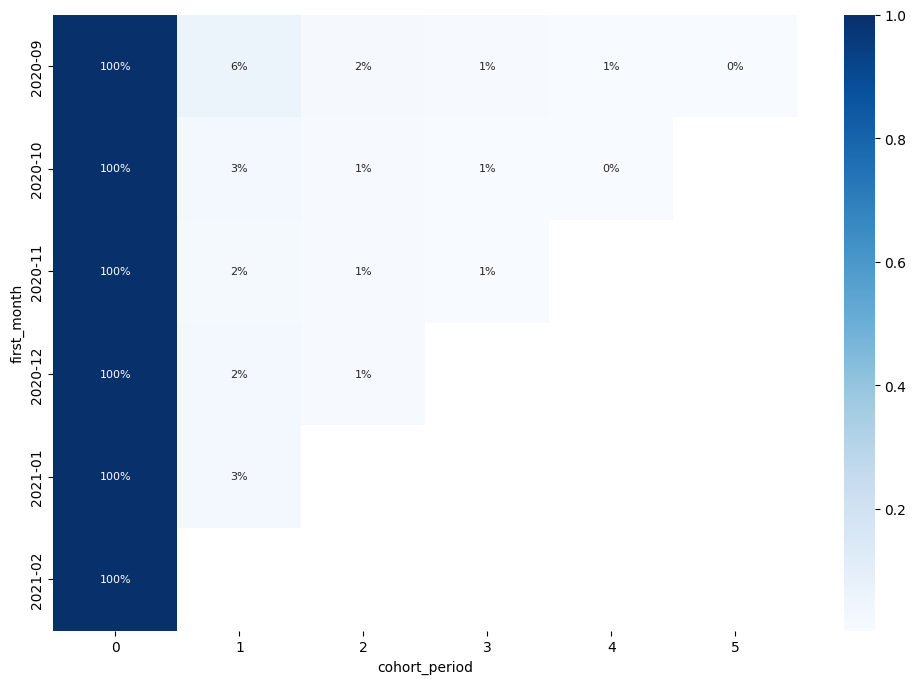

In [ ]:
# 코호트별 MAU
plt.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(retention, annot=True, fmt='.0%', cmap='Blues', annot_kws={'size':8})

- 코호트별 차이

In [ ]:
# 월별로 cart 이벤트를 발생시킨 distinct한 user_id
df[df['event_type']=='cart'].groupby('month')['user_id'].nunique()

month
2020-09    1054
2020-10    6424
2020-11    7434
2020-12    6650
2021-01    8517
2021-02    7726
Freq: M, Name: user_id, dtype: int64

In [ ]:
# 월별로 purchase 이벤트를 발생시킨 distinct한 user_id
df[df['event_type']=='purchase'].groupby('month')['user_id'].nunique()

month
2020-09     627
2020-10    3796
2020-11    4328
2020-12    3869
2021-01    4771
2021-02    4341
Freq: M, Name: user_id, dtype: int64

- 인게이지먼트(DAU/MAU)